# Project Task: Week 1

# Importing, Understanding, and Inspecting Data :

# 1.Perform preliminary data inspection and report the findings as the structure of the data, missing values, duplicates, etc.

In [1]:
pip install nbconvert

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
sudo apt-get install pandoc

SyntaxError: invalid syntax (1901338604.py, line 1)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Importing Dataset

In [3]:
data = pd.read_csv("C:\\Users\\44758\\OneDrive\\Desktop\\Capstone Project\\data.csv")

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# Checking No. of rows and columns

In [6]:
data.shape

(303, 14)

# Getting the information about the data.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [8]:
data.size

4242

# Checking for missing values

In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [11]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
df2 = data.copy()

In [13]:
data['target'].value_counts() 

1    165
0    138
Name: target, dtype: int64

# 2.Based on the findings from the previous question, remove duplicates (if any) and treat missing values using an appropriate strategy.

In [14]:
X= data.drop(columns='target', axis=1)
Y = data['target']

# 3.Get a preliminary statistical summary of the data. Explore the measures of central tendencies and the spread of the data overall.

In [15]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [16]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [17]:
data.shape

(303, 14)

# Performing EDA:

# 4.Identify the data variables which might be categorical in nature. Describe and explore these variables using appropriate tools. For example: count plot.

In [18]:
target_counts = data.target.value_counts()

In [19]:
print('Class 0:', target_counts[0])
print('Class 1:', target_counts[1])
print('Proportion:', round(target_counts[0] / target_counts[1], 2), ': 1')

Class 0: 138
Class 1: 165
Proportion: 0.84 : 1


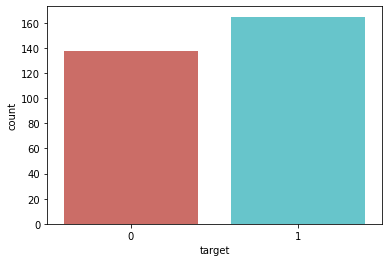

In [20]:
sns.countplot(x='target', data = data, palette = 'hls')
plt.show()

In [21]:
print(data.apply(lambda col: col.unique()))

age         [63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5...
sex                                                    [1, 0]
cp                                               [3, 2, 1, 0]
trestbps    [145, 130, 120, 140, 172, 150, 110, 135, 160, ...
chol        [233, 250, 204, 236, 354, 192, 294, 263, 199, ...
fbs                                                    [1, 0]
restecg                                             [0, 1, 2]
thalach     [150, 187, 172, 178, 163, 148, 153, 173, 162, ...
exang                                                  [0, 1]
oldpeak     [2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ...
slope                                               [0, 2, 1]
ca                                            [0, 2, 1, 3, 4]
thal                                             [1, 2, 3, 0]
target                                                 [1, 0]
dtype: object


In [22]:
data.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


<AxesSubplot:>

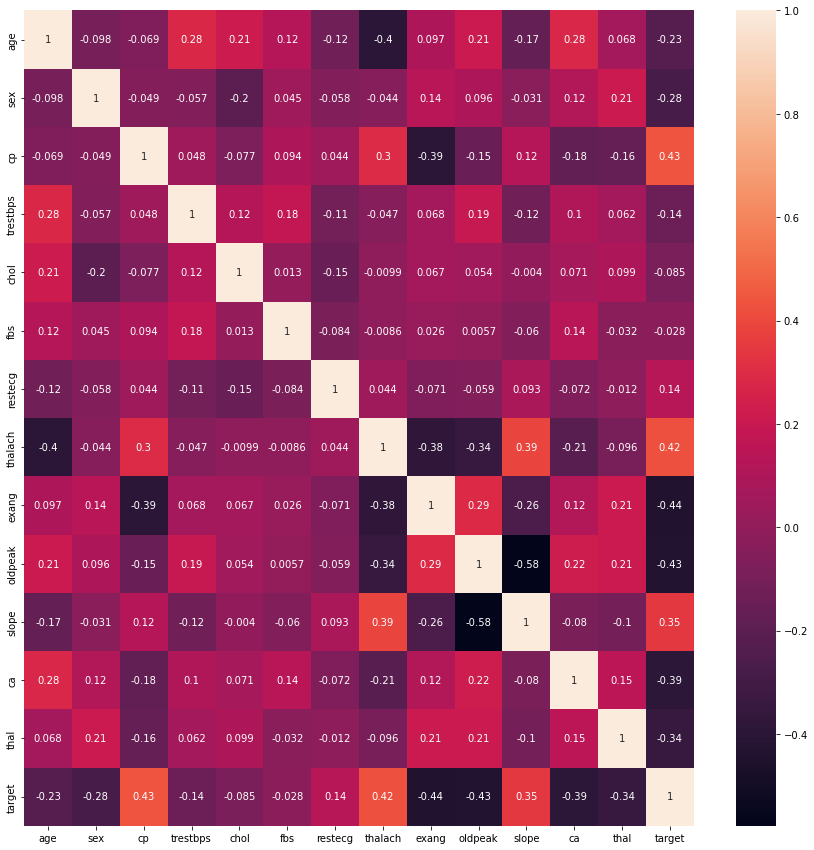

In [23]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(data.corr(),annot=True,ax=ax)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

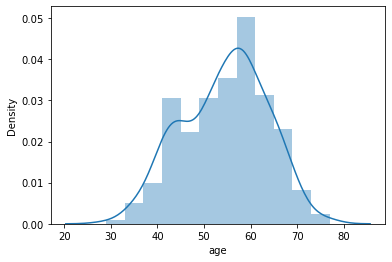

In [24]:
sns.distplot(data.age)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


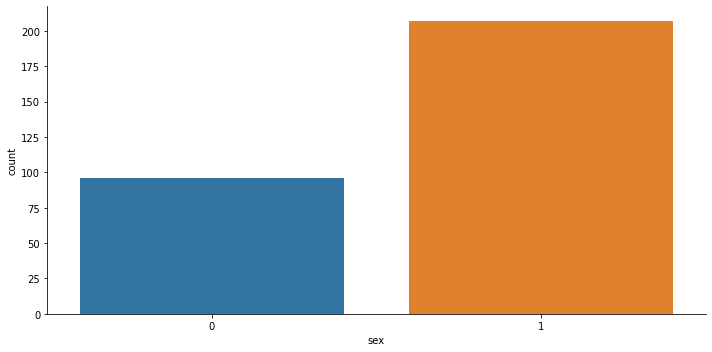

In [25]:
sns.factorplot('sex', data = data, kind = 'count', aspect = 2.0)

# There are significantly more men in the data than women

# 5.Study the occurrence of CVD across different ages.

# 6. Can we detect heart attack based on anomalies in resting blood pressure of the patient?
# A box plot to show the ranges of ages of the women and men in the data

<AxesSubplot:xlabel='sex', ylabel='age'>

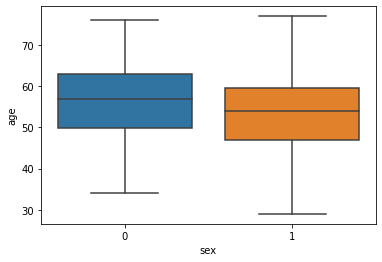

In [26]:
sns.boxplot(data = data, x = 'sex', y = 'age')

In [27]:
hist_df = data.groupby('target')

In [28]:
hist_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3,0
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2,0
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
169,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0


In [29]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Project Task: Week 2. 1.Describe the relationship between cholesterol levels and our target variable.

# Combining the Age with Target columns,

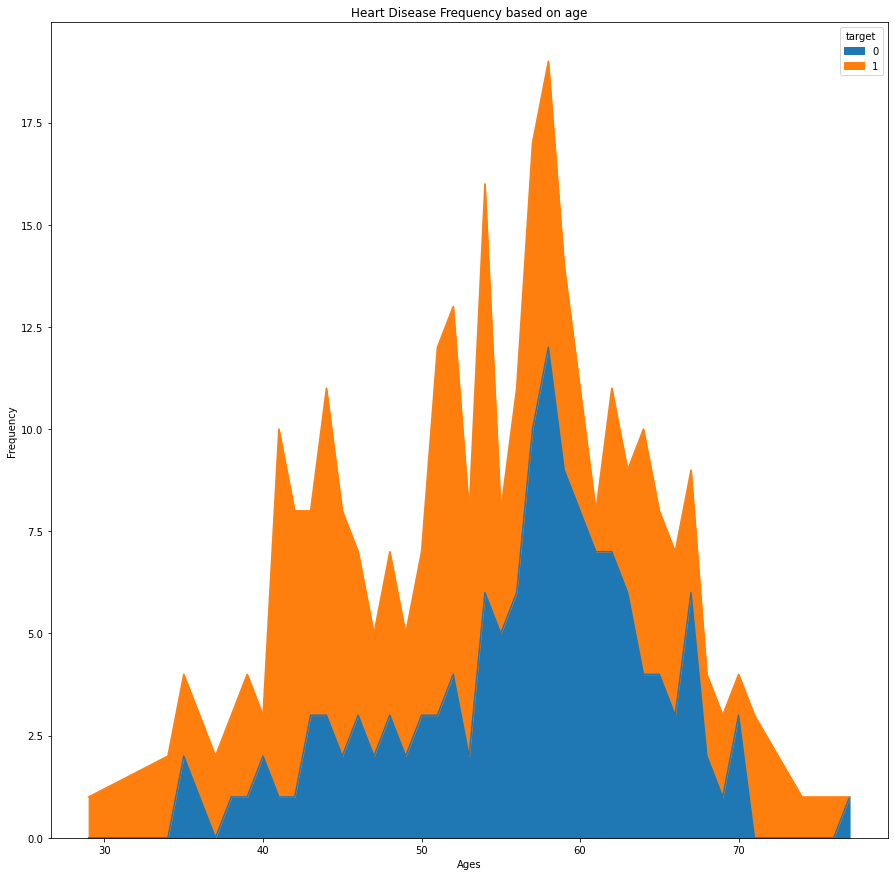

In [30]:
pd.crosstab(data.age, data.target).plot(kind= "area", figsize=(15, 15))
plt.title('Heart Disease Frequency based on age')
plt.xlabel('Ages')
plt.ylabel('Frequency')
plt.show()

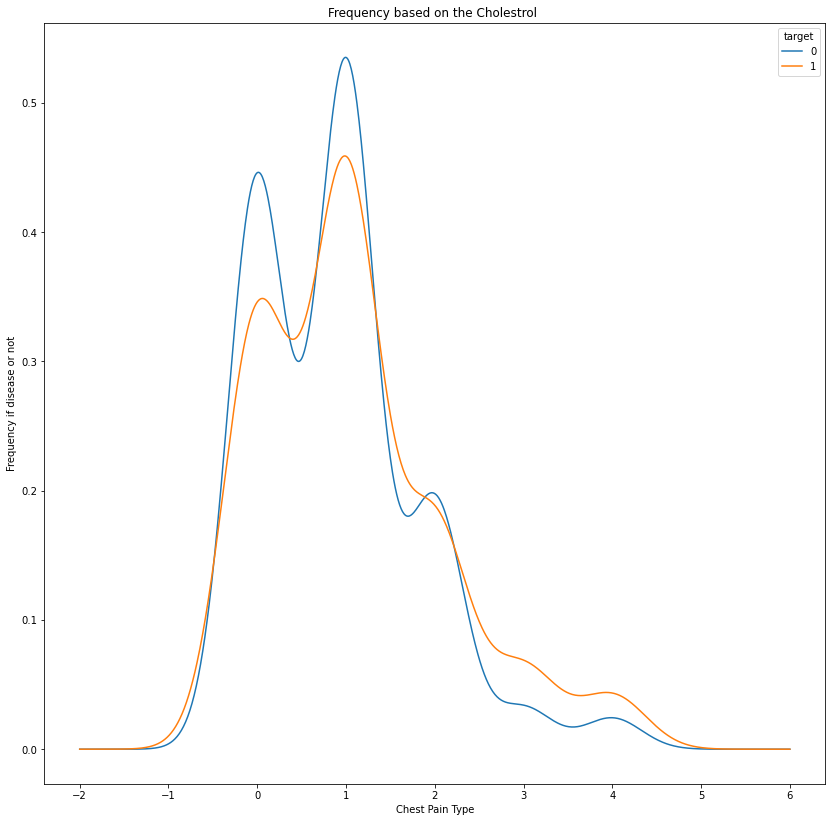

In [31]:
pd.crosstab(data.chol, data.target).plot(kind= "kde", figsize= (14, 14))
plt.title('Frequency based on the Cholestrol ')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency if disease or not')
plt.show()

# A distribution of the ages of patients that suffered a heart attack.

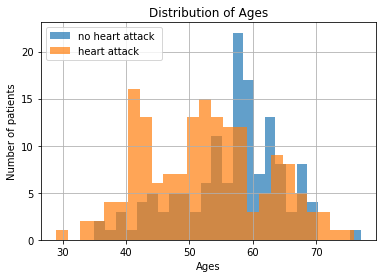

In [32]:
hist_df['age'].hist(bins=25, alpha=0.7)
plt.title('Distribution of Ages')
plt.xlabel('Ages')
plt.ylabel('Number of patients')
plt.legend(('no heart attack ', 'heart attack'), loc = 'upper left')
plt.show()

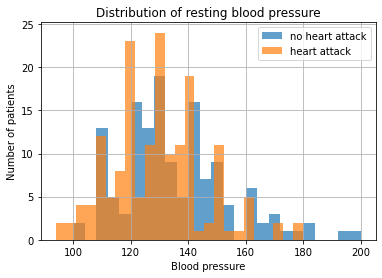

In [181]:
hist_df['trestbps'].hist(bins=25, alpha=0.7)
plt.title('Distribution of resting blood pressure')
plt.xlabel('Blood pressure')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

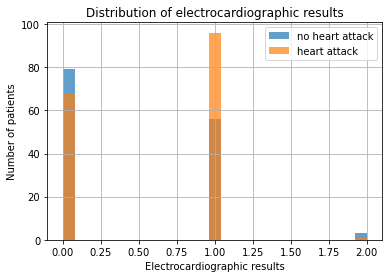

In [33]:
hist_df['restecg'].hist(bins = 25, alpha = 0.7)
plt.title('Distribution of electrocardiographic results')
plt.xlabel('Electrocardiographic results')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

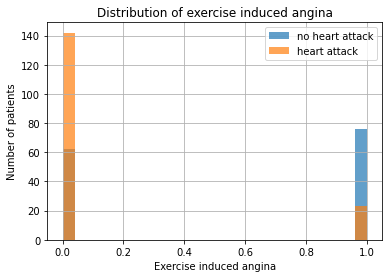

In [34]:
hist_df['exang'].hist(bins = 25, alpha = 0.7)
plt.title('Distribution of exercise induced angina')
plt.xlabel('Exercise induced angina')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

# 2.What can be concluded about the relationship between peak exercising and occurrence of heart attack?

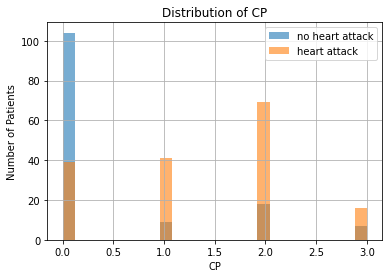

In [35]:
hist_df['cp'].hist(bins = 25, alpha=0.6)
plt.title('Distribution of CP')
plt.xlabel('CP')
plt.ylabel('Number of Patients')
plt.legend(('no heart attack', 'heart attack'))
plt.show()

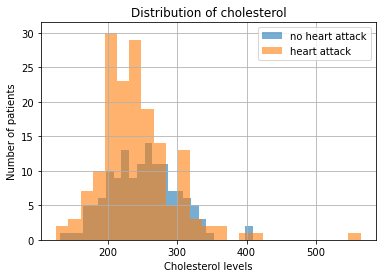

In [36]:
hist_df['chol'].hist(bins = 25, alpha=0.6)
plt.title('Distribution of cholesterol')
plt.xlabel('Cholesterol levels')
plt.ylabel('Number of patients')
plt.legend(('no heart attack', 'heart attack'), loc = 'upper right')
plt.show()

In [37]:
def get_gender(sex_value):
    
    gender_string = 'Male'
    
    if sex_value == 0:
        gender_string = 'Female'
    return gender_string

def get_cp_category(cp_value):
    
    if cp_value == 0:
        cp_string = 'typical'
    elif cp_value == 1:
        cp_string = 'atypical'
    elif cp_value == 2:
        cp_string = 'non_anginal'
    elif cp_value == 3:
        cp_string = 'asmptomatic'
    
    return(cp_string)

In [38]:
subset_df = data[['sex', 'cp']]

In [39]:
subset_df.head()

,sex,cp
0,1,3
1,1,2
2,0,1
3,1,1
4,0,0


# 3.Is thalassemia a major cause of CVD? How are the other factors determining the occurrence of CVD?

In [40]:
subset_df['sex'] = subset_df.sex.map(lambda x: get_gender(x))
subset_df['cp'] = subset_df.cp.map(lambda x: get_cp_category(x))

C:\Users\44758\AppData\Local\Temp\ipykernel_26944\3196417220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['sex'] = subset_df.sex.map(lambda x: get_gender(x))
C:\Users\44758\AppData\Local\Temp\ipykernel_26944\3196417220.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df['cp'] = subset_df.cp.map(lambda x: get_cp_category(x))


In [41]:
subset_df.head()

,sex,cp
0,Male,asmptomatic
1,Male,non_anginal
2,Female,atypical
3,Male,atypical
4,Female,typical


In [42]:
dum_df = pd.get_dummies(subset_df[['sex', 'cp']])

In [43]:
dum_df.head()

,sex_Female,sex_Male,cp_asmptomatic,cp_atypical,cp_non_anginal,cp_typical
0,0,1,1,0,0,0
1,0,1,0,0,1,0
2,1,0,0,1,0,0
3,0,1,0,1,0,0
4,1,0,0,0,0,1


In [44]:
dum_df = dum_df.drop(['sex_Female'], axis = 1)

In [45]:
dum_df.rename(columns = {'sex_Male': 'Male'}, inplace = True)

In [46]:
df = pd.concat([data, dum_df], axis = 1)

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Male,cp_asmptomatic,cp_atypical,cp_non_anginal,cp_typical
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,1,0,0,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,0,1,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,0,0,1,0,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,1,0,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,0,0,0,0,1


In [48]:
df = df.drop(['sex', 'cp'], axis = 1)

In [49]:
df.columns

Index(['age', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target', 'Male', 'cp_asmptomatic',
       'cp_atypical', 'cp_non_anginal', 'cp_typical'],
      dtype='object')

# Model building in Scikit-learn. Loading Data

In [50]:
df = df[['age', 'Male', 'cp_asmptomatic','cp_typical', 'cp_non_anginal', 'cp_atypical', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target']]

In [51]:
df.columns

Index(['age', 'Male', 'cp_asmptomatic', 'cp_typical', 'cp_non_anginal',
       'cp_atypical', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang',
       'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [52]:
print(data.age.min())
print(data.age.max())
data[data['age'] < 30]

29
77


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


# 4.Use a pair plot to understand the relationship between all the given variables.

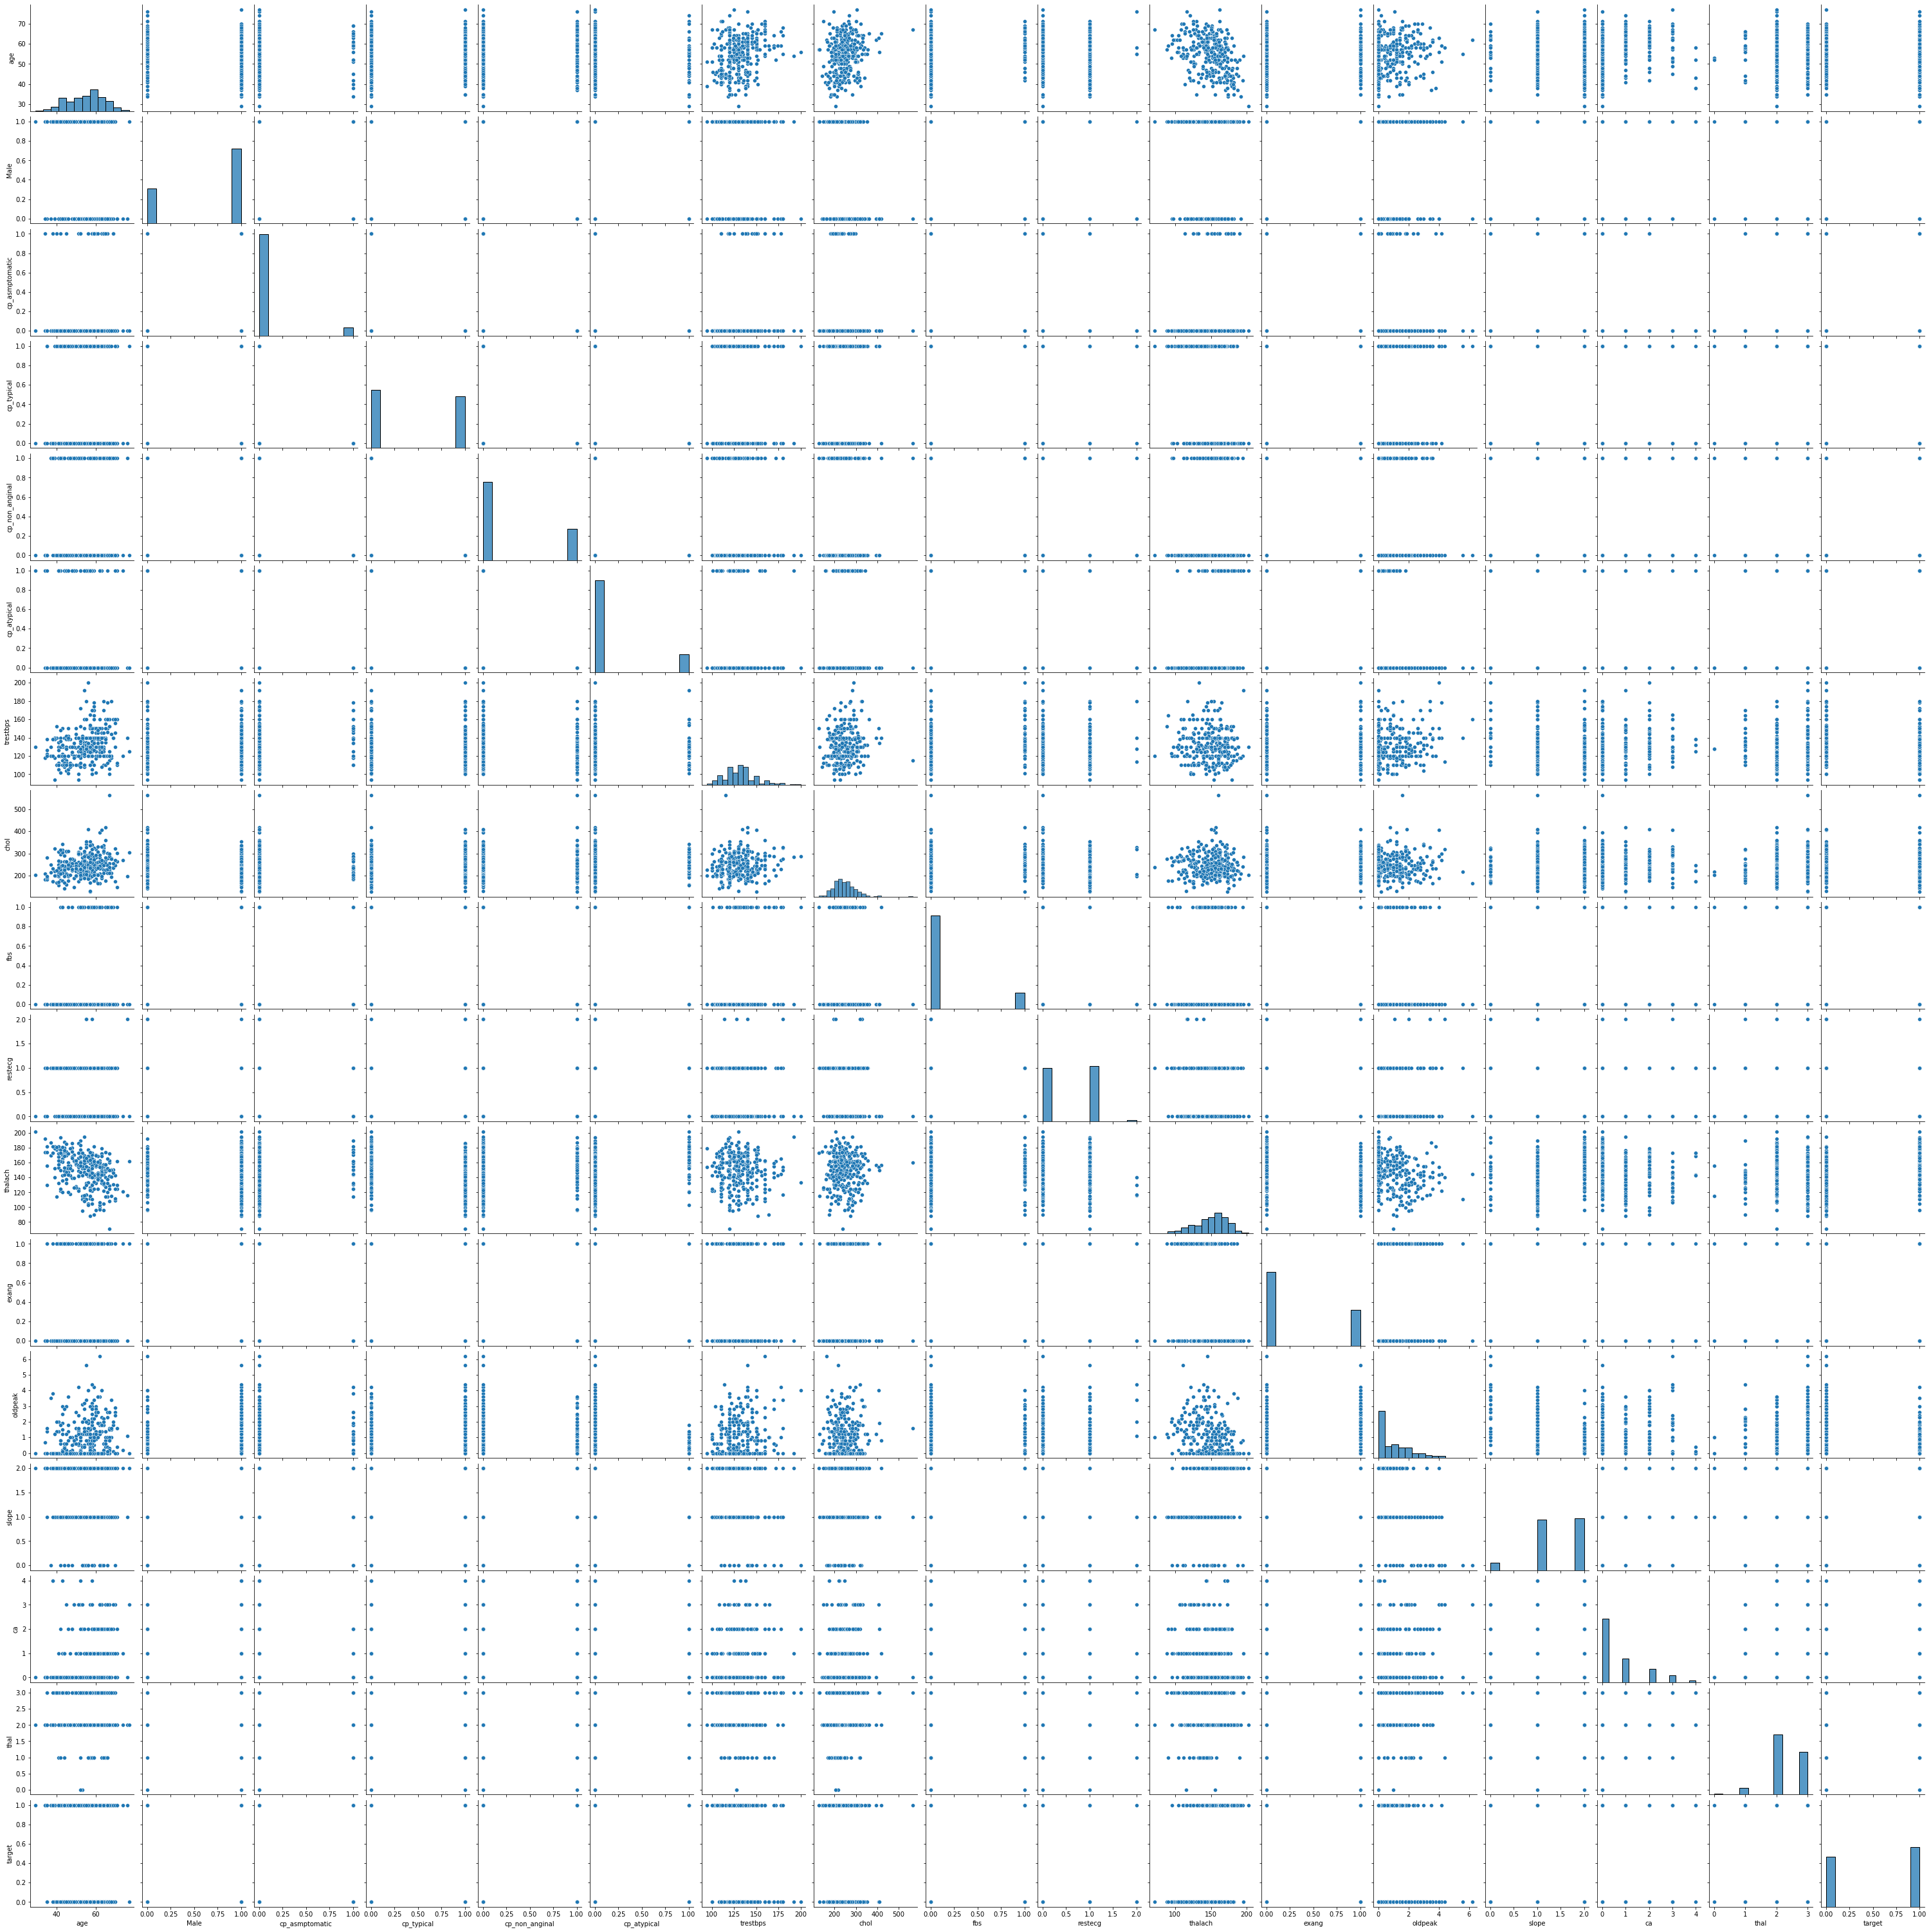

In [53]:
sns.pairplot(df)

In [54]:
X = df.iloc[:, :-1].values

In [55]:
X

array([[63.,  1.,  1., ...,  0.,  0.,  1.],
       [37.,  1.,  0., ...,  0.,  0.,  2.],
       [41.,  0.,  0., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  0., ...,  1.,  1.,  2.]])

In [56]:
Y = df.iloc[:, 16].values

In [57]:
Y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# 5.Perform logistic regression, predict the outcome for test data, and validate the results by using the confusion matrix.

# Splitting the Data into training data and test Data. Logistic Regression

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

In [59]:
print(X.shape, X_train.shape, X_test.shape)

(303, 16) (212, 16) (91, 16)


# Training the LogisticRegression model with Training data. Model Development and Prediction

In [60]:
logistic_model = LogisticRegression()

In [61]:
logistic_model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
logistic_predictions = logistic_model.predict(X_test)

In [63]:
y_pred = logistic_model.predict(X_test)

# Model Evaluation using Confusion Matrix

In [64]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[35,  9],
       [ 7, 40]], dtype=int64)

In [65]:
print(metrics.confusion_matrix(y_test, logistic_predictions))
print('\n')
print(classification_report(y_test, logistic_predictions))
print('\n')
print('Accuracy of logistic regression classifier {}'.format(logistic_model.score(X_test, y_test)))

[[35  9]
 [ 7 40]]




NameError: name 'classification_report' is not defined

Text(0.5, 257.44, 'Predicted label')

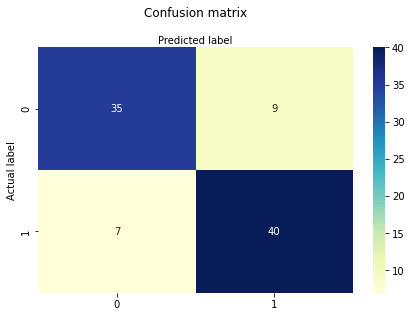

In [224]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
sns.heatmap(cnf_matrix, annot = True,cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [66]:
print("Accuracy:",metrics.accuracy_score(y_test, logistic_predictions))
print("Precision:",metrics.precision_score(y_test, logistic_predictions))
print("Recall:",metrics.recall_score(y_test, logistic_predictions))

Accuracy: 0.8241758241758241
Precision: 0.8163265306122449
Recall: 0.851063829787234


# There is no overfitting, The prediction model is good

In [67]:
data.to_excel('Output.xlsx')

# Output is the excel name uploaded in Tableau

# Tableau Public Link: https://public.tableau.com/views/FactorsResponsibleforHeartAttacks_16598016583690/AgeDistributation?:language=en-US&:display_count=n&:origin=viz_share_link

In [ ]:
https://public.tableau.com/views/FactorsResponsibleforHeartAttacks_16598016583690/AgeDistributation?:language=en-US&:display_count=n&:origin=viz_share_link